In [1]:
import matplotlib.pyplot as plt

In [2]:
import cartopy.crs as ccrs

In [3]:
import cartopy.feature as cf

In [4]:
import cartopy.io.shapereader as shapereader

In [14]:
import random

In [5]:
plt.style.use("bmh")

In [7]:
_DEFAULT_PROJECTION = ccrs.Mercator().GOOGLE
%matplotlib inline

In [8]:
shapename = "admin_1_states_provinces_lakes_shp"

In [9]:
states_shp = shapereader.natural_earth(resolution="50m", category="cultural", name=shapename)

In [10]:
states_shp

'/home/rbeattie/.local/share/cartopy/shapefiles/natural_earth/cultural/ne_50m_admin_1_states_provinces_lakes_shp.shp'

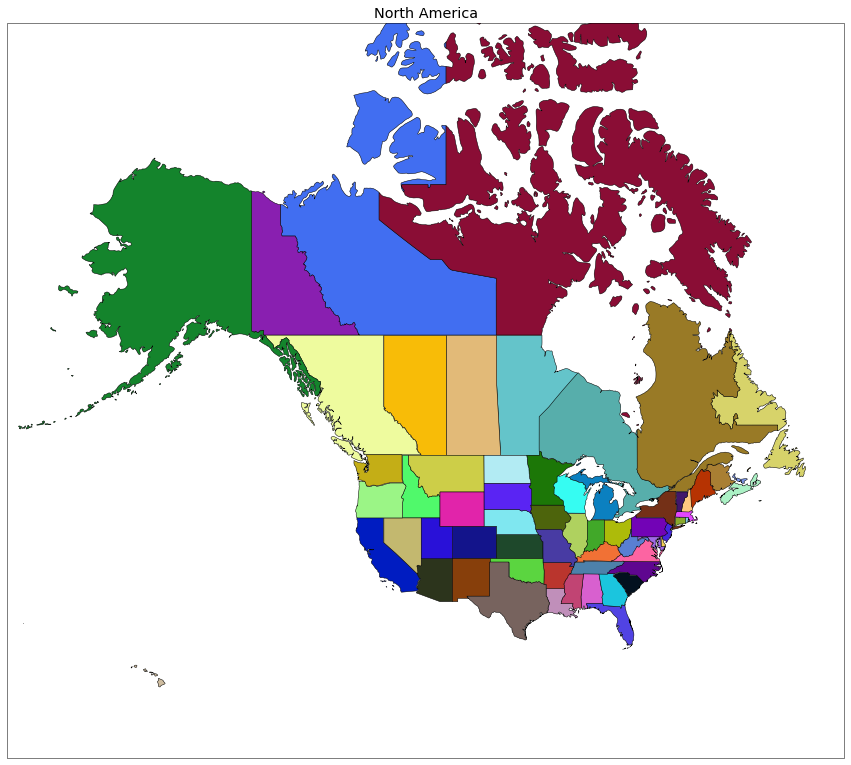

In [18]:
def rancolor():
    return "#" + "%06x" % random.randint(0, 0xFFFFFF)

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=_DEFAULT_PROJECTION)
ax.set_extent([-180, -46.5, 8, 60], ccrs.Geodetic())
ax.set_title("North America")
for state in shapereader.Reader(states_shp).geometries():
    ax.add_geometries(state, ccrs.PlateCarree(), facecolor=rancolor(), edgecolor='black')

/home/rbeattie/anaconda3/envs/MSEAS-VE-1/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7ffa5f423728> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


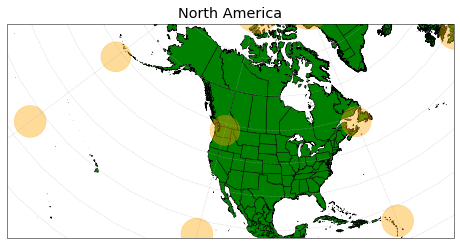

In [39]:
states_feature = cf.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes_shp', scale="10m", facecolor="green", edgecolor="black")
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.LambertConformal())
ax.set_extent([-180, -46.5, 8, 60], ccrs.Geodetic())
ax.set_title("North America")
ax.add_feature(states_feature)
ax.gridlines(linestyle=":")
ax.tissot(color='orange', alpha=0.4)

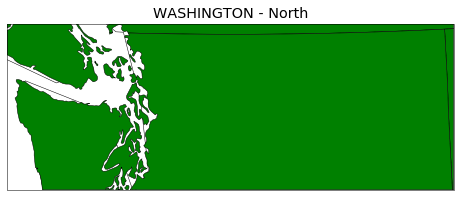

In [57]:
WASHINGTON_NORTH = 2926
WASHINGTON_SOUTH = 2927
SEATTLE_BOUNDS = [-122.459659, -122.2244331, 47.4919119, 47.734145]
WASHINGTON_BOUNDS = [-124.849, -116.9156, 45.5435, 49.0024]
SEATTLE_CENTER = (-122.3321, 47.6062)

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.epsg(WASHINGTON_NORTH))
ax.set_title("WASHINGTON - North")
ax.add_feature(states_feature)
# ax.annotate('Seattle', xy=SEATTLE_CENTER, xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='yellow', ha='left', va='center')
# ax.gridlines(linestyle=":")
# ax.tissot(lats=range(43, 51), lons=range(-124, -116), alpha=0.4, rad_km=20
#           , color='orange')

/home/rbeattie/anaconda3/envs/MSEAS-VE-1/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:632: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x7ffa5f54fa40> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


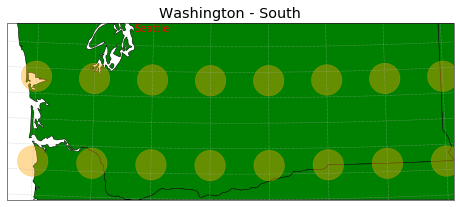

In [50]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.epsg(WASHINGTON_SOUTH))
ax.set_title("Washington - South")
ax.annotate('Seattle', xy=SEATTLE_CENTER, xycoords=ccrs.PlateCarree()._as_mpl_transform(ax), color='red', ha='left', va='center')
ax.add_feature(states_feature)
ax.tissot(lats=range(43,51), lons=range(-124,-116), alpha=0.4, rad_km=20, color='orange')
ax.gridlines(linestyle=":")

## Extracting data from the features

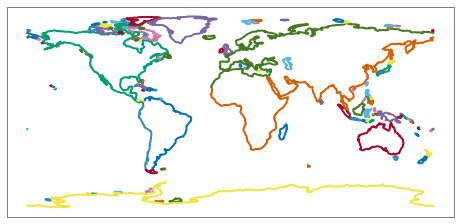

In [71]:
fig = plt.figure(figsize=(8, 8))
ax2 = plt.axes(projection=_DEFAULT_PROJECTION)
for geom in cf.COASTLINE.geometries():
    for g in geom.geoms:
        print(g.coords)
        ax2.plot(*zip(*list(g.coords)))